# Customer Churn Prediction Using Machine Learning

This project aims to predict customer churn using various machine learning models based on a bank's customer data. By analyzing demographic, account, and activity details, the project helps identify customers who are likely to leave the bank, allowing proactive retention strategies.

## Exploratory Data Analysis

### 1] Firstly importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2] Loading the dataset

In [3]:
df=pd.read_csv("../Data/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3] Data inspection

In [5]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


As there are no duplicate values and no null values we don't need to do data cleaning 

### 4]Outlier treatment

##### Detect outliers

In [17]:
data1=df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]
data1.head()

,CreditScore,Age,Balance,EstimatedSalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10


In [19]:
# Inter quartile range
def detect_outlier(data, column):
  outliers=[]
  Q1=data[column].quantile(0.25)
  Q2=data[column].quantile(0.75)
  IQR=Q2-Q1
  lowerbound = Q1 - 1.5 * IQR
  upperbound = Q2 + 1.5 * IQR

  for i in data[column]:
    if i > upperbound or i < lowerbound:
      outliers.append(i)
  print("column: ",column)
  print("Outliers: ",outliers)
  print("Lower Bound: ",lowerbound)
  print("Upper Bound: ",upperbound)
  print("--------------------")
for i in data1.columns:
  detect_outlier(data1,i)


column:  CreditScore
Outliers:  [376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350]
Lower Bound:  383.0
Upper Bound:  919.0
--------------------
column:  Age
Outliers:  [66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63, 71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68, 66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63, 70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75, 68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78, 65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 63, 79, 66, 64, 70, 69, 71, 72, 66, 68, 63, 71, 72, 72, 64, 78, 75, 65, 65, 67

Skewness of EstimatedSalary: 0.00
Skewness of Balance: -0.14


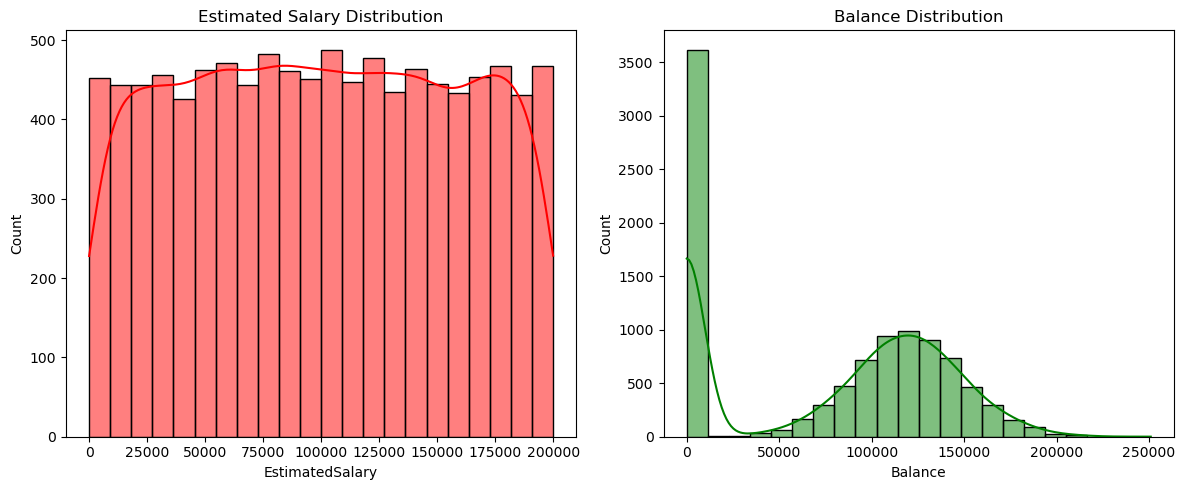

In [29]:

plt.figure(figsize=(12, 5))

# Plot EstimatedSalary
plt.subplot(1, 2, 1)
sns.histplot(data1['EstimatedSalary'], kde=True, color='red')
plt.title('Estimated Salary Distribution')
plt.xlabel('EstimatedSalary')
salary_skew = data1['EstimatedSalary'].skew()
print(f"Skewness of EstimatedSalary: {salary_skew:.2f}")

# Plot Balance
plt.subplot(1, 2, 2)
sns.histplot(data1['Balance'], kde=True, color='green')
plt.title('Balance Distribution')
plt.xlabel('Balance')
balance_skew = data1['Balance'].skew()
print(f"Skewness of Balance: {balance_skew:.2f}")

plt.tight_layout()
plt.show()


In [21]:
# Function to remove outliers using IQR for a specific column
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows within bounds
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

# Remove outliers from 'CreditScore'
data1 = remove_outliers_iqr(data1, 'CreditScore')

# Remove outliers from 'Age'
data1 = remove_outliers_iqr(data1, 'Age')

# Display new shape of dataset
print("Data shape after removing outliers from CreditScore and Age:", data1.shape)


Data shape after removing outliers from CreditScore and Age: (9626, 4)


We are performing Log Transformation to remove outliers for the columns EstimatedSalary and Balance to reduce the skewness

In [23]:
# Apply log1p (log(1 + x)) to handle zero values safely
data1['EstimatedSalary_log'] = np.log1p(data1['EstimatedSalary'])
data1['Balance_log'] = np.log1p(data1['Balance'])

# Check first few values to confirm
print(data1[['EstimatedSalary', 'EstimatedSalary_log']].head())
print(data1[['Balance', 'Balance_log']].head())

   EstimatedSalary  EstimatedSalary_log
0        101348.88            11.526334
1        112542.58            11.631096
2        113931.57            11.643362
3         93826.63            11.449215
4         79084.10            11.278280
     Balance  Balance_log
0       0.00     0.000000
1   83807.86    11.336294
2  159660.80    11.980813
3       0.00     0.000000
4  125510.82    11.740155


### 5] Visualization

Types of Analysis
- a. Uni-variate analysis
- b. Bi-variate analysis

#### Uni-variate analysis
- For all categorical

In [25]:
cat_data=df[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']]
cat_data.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0


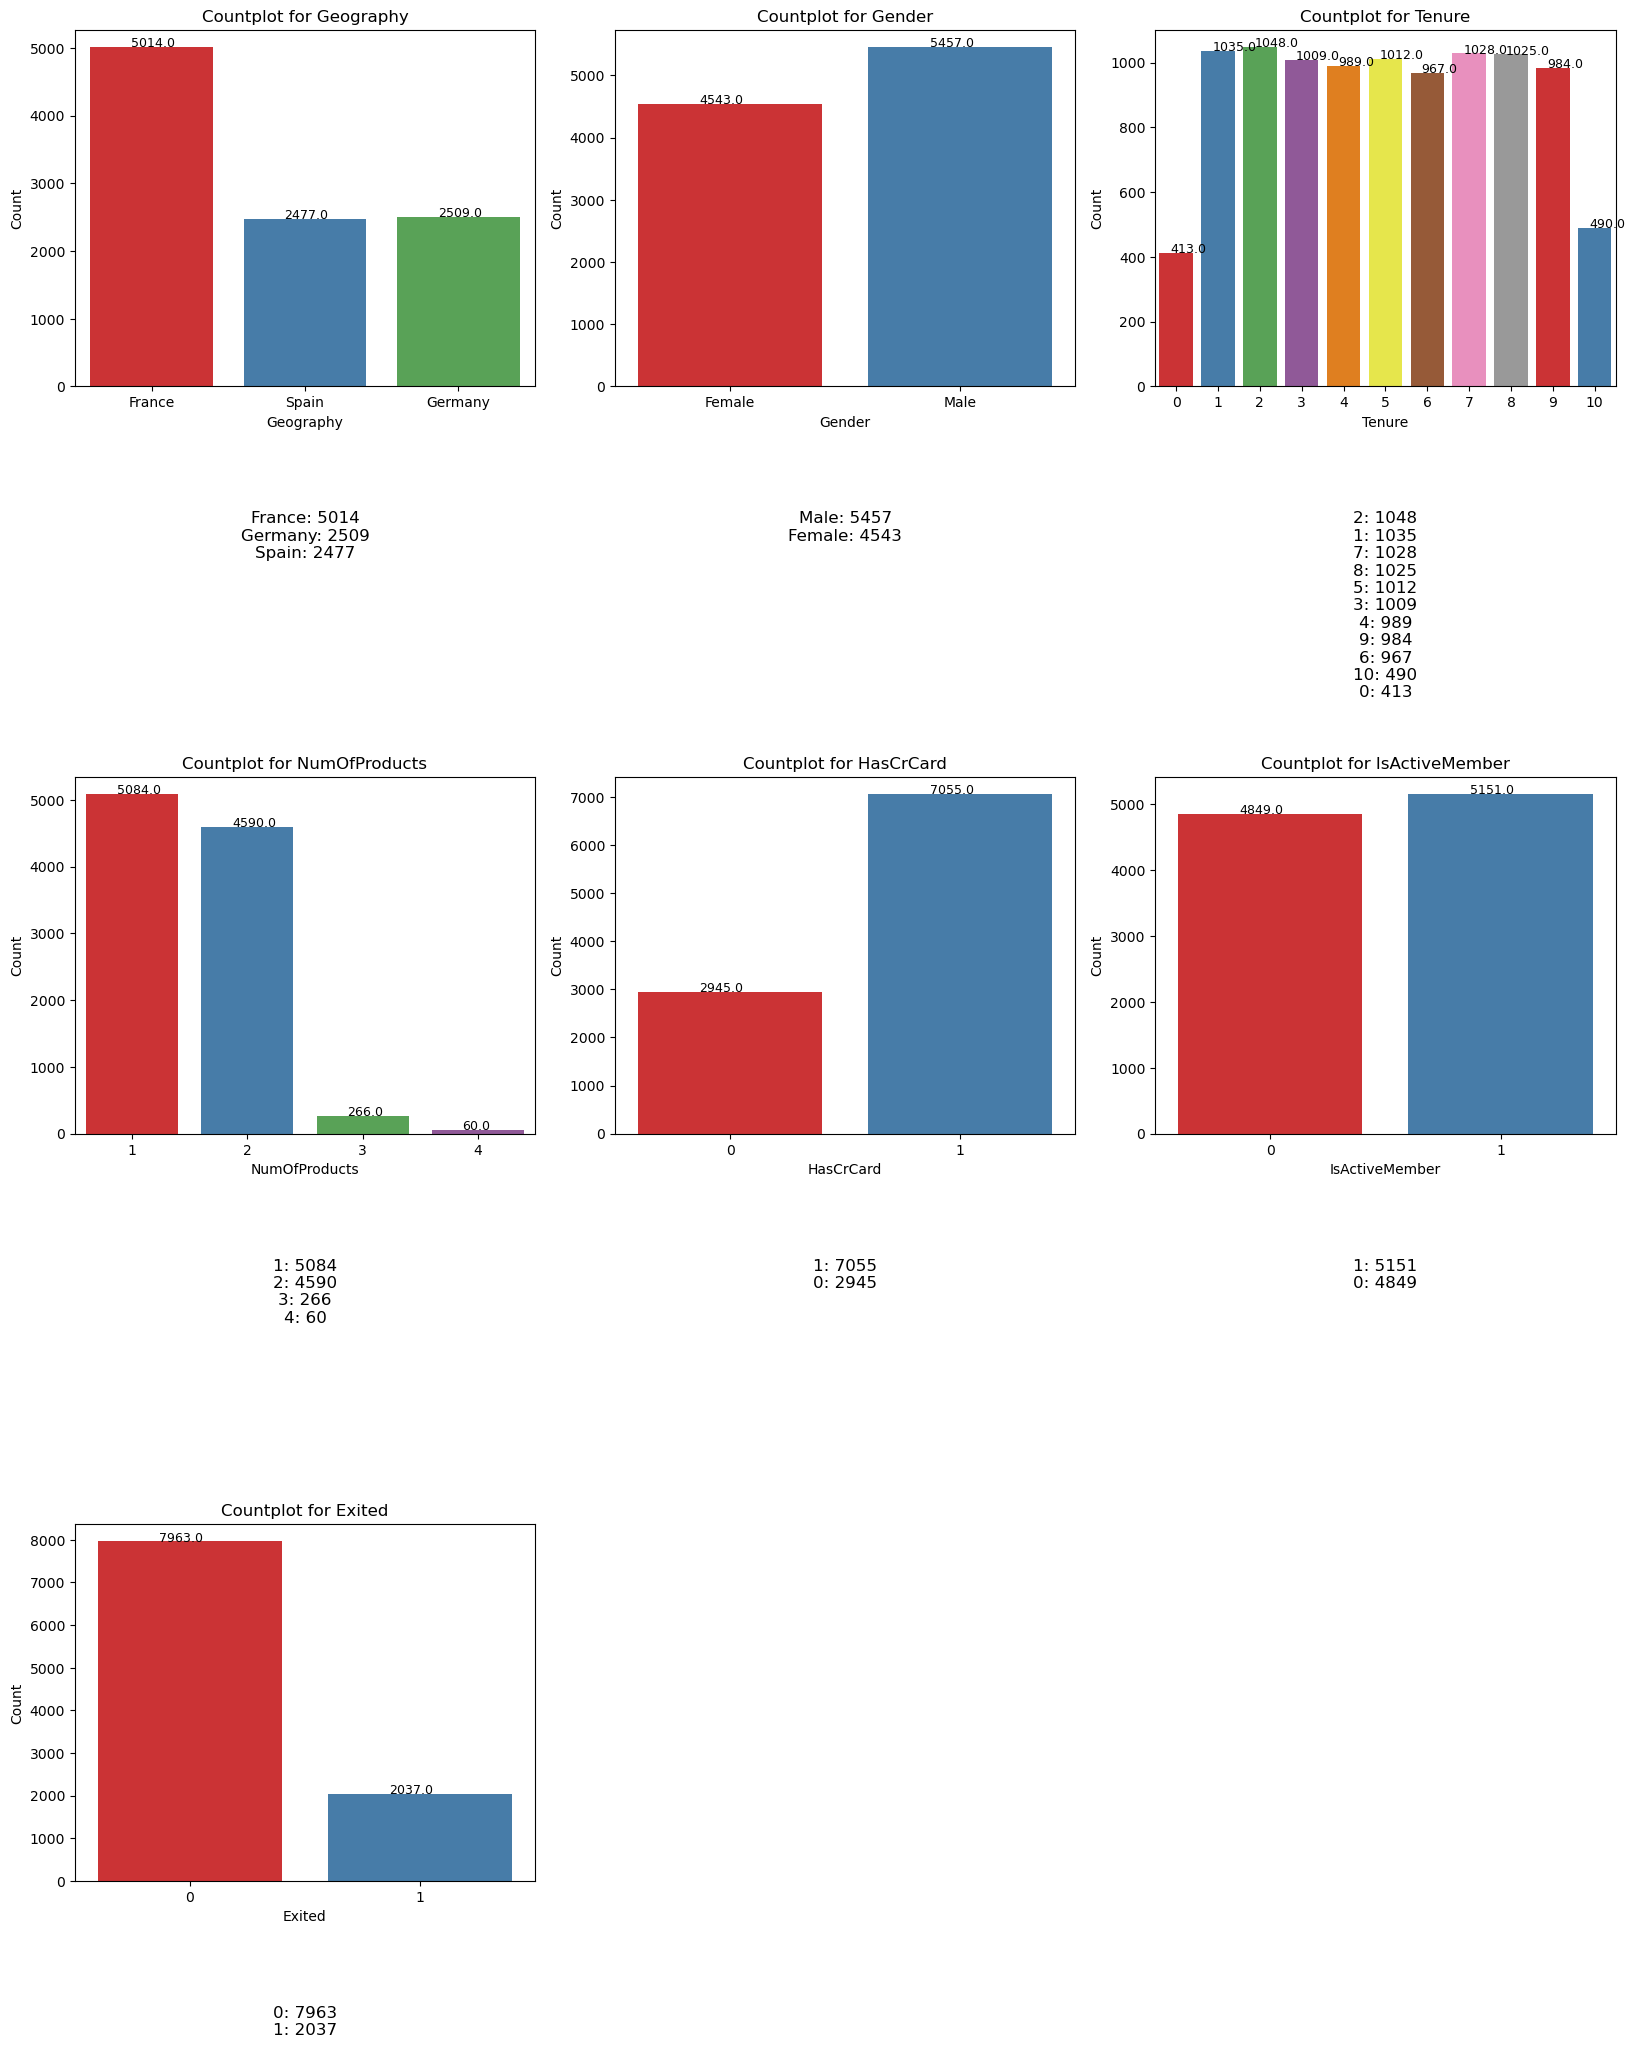

In [27]:
# Countplot
# Grid size setup
num_plots = len(cat_data.columns)
cols = 3  # Number of columns in a row
rows = (num_plots + cols - 1) // cols  # Ceiling division to get rows

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5.5, rows * 7))
axes = axes.flatten()  # Flatten 2D array to 1D

for i in range(num_plots):
    col = cat_data.columns[i]
    ax = axes[i]
    sns.countplot(x=cat_data[col], hue=cat_data[col], palette='Set1', ax=ax, legend=False)
    ax.set_title(f'Countplot for {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    # Annotate each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 3, p.get_height() + 0.5),
                    fontsize=9)

    # Get value counts and display as text below plot
    vc = cat_data[col].value_counts()
    count_text = '\n'.join([f'{idx}: {val}' for idx, val in vc.items()])
    
    # Place value count as a text box below the plot
    ax.text(0.5, -0.35, count_text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

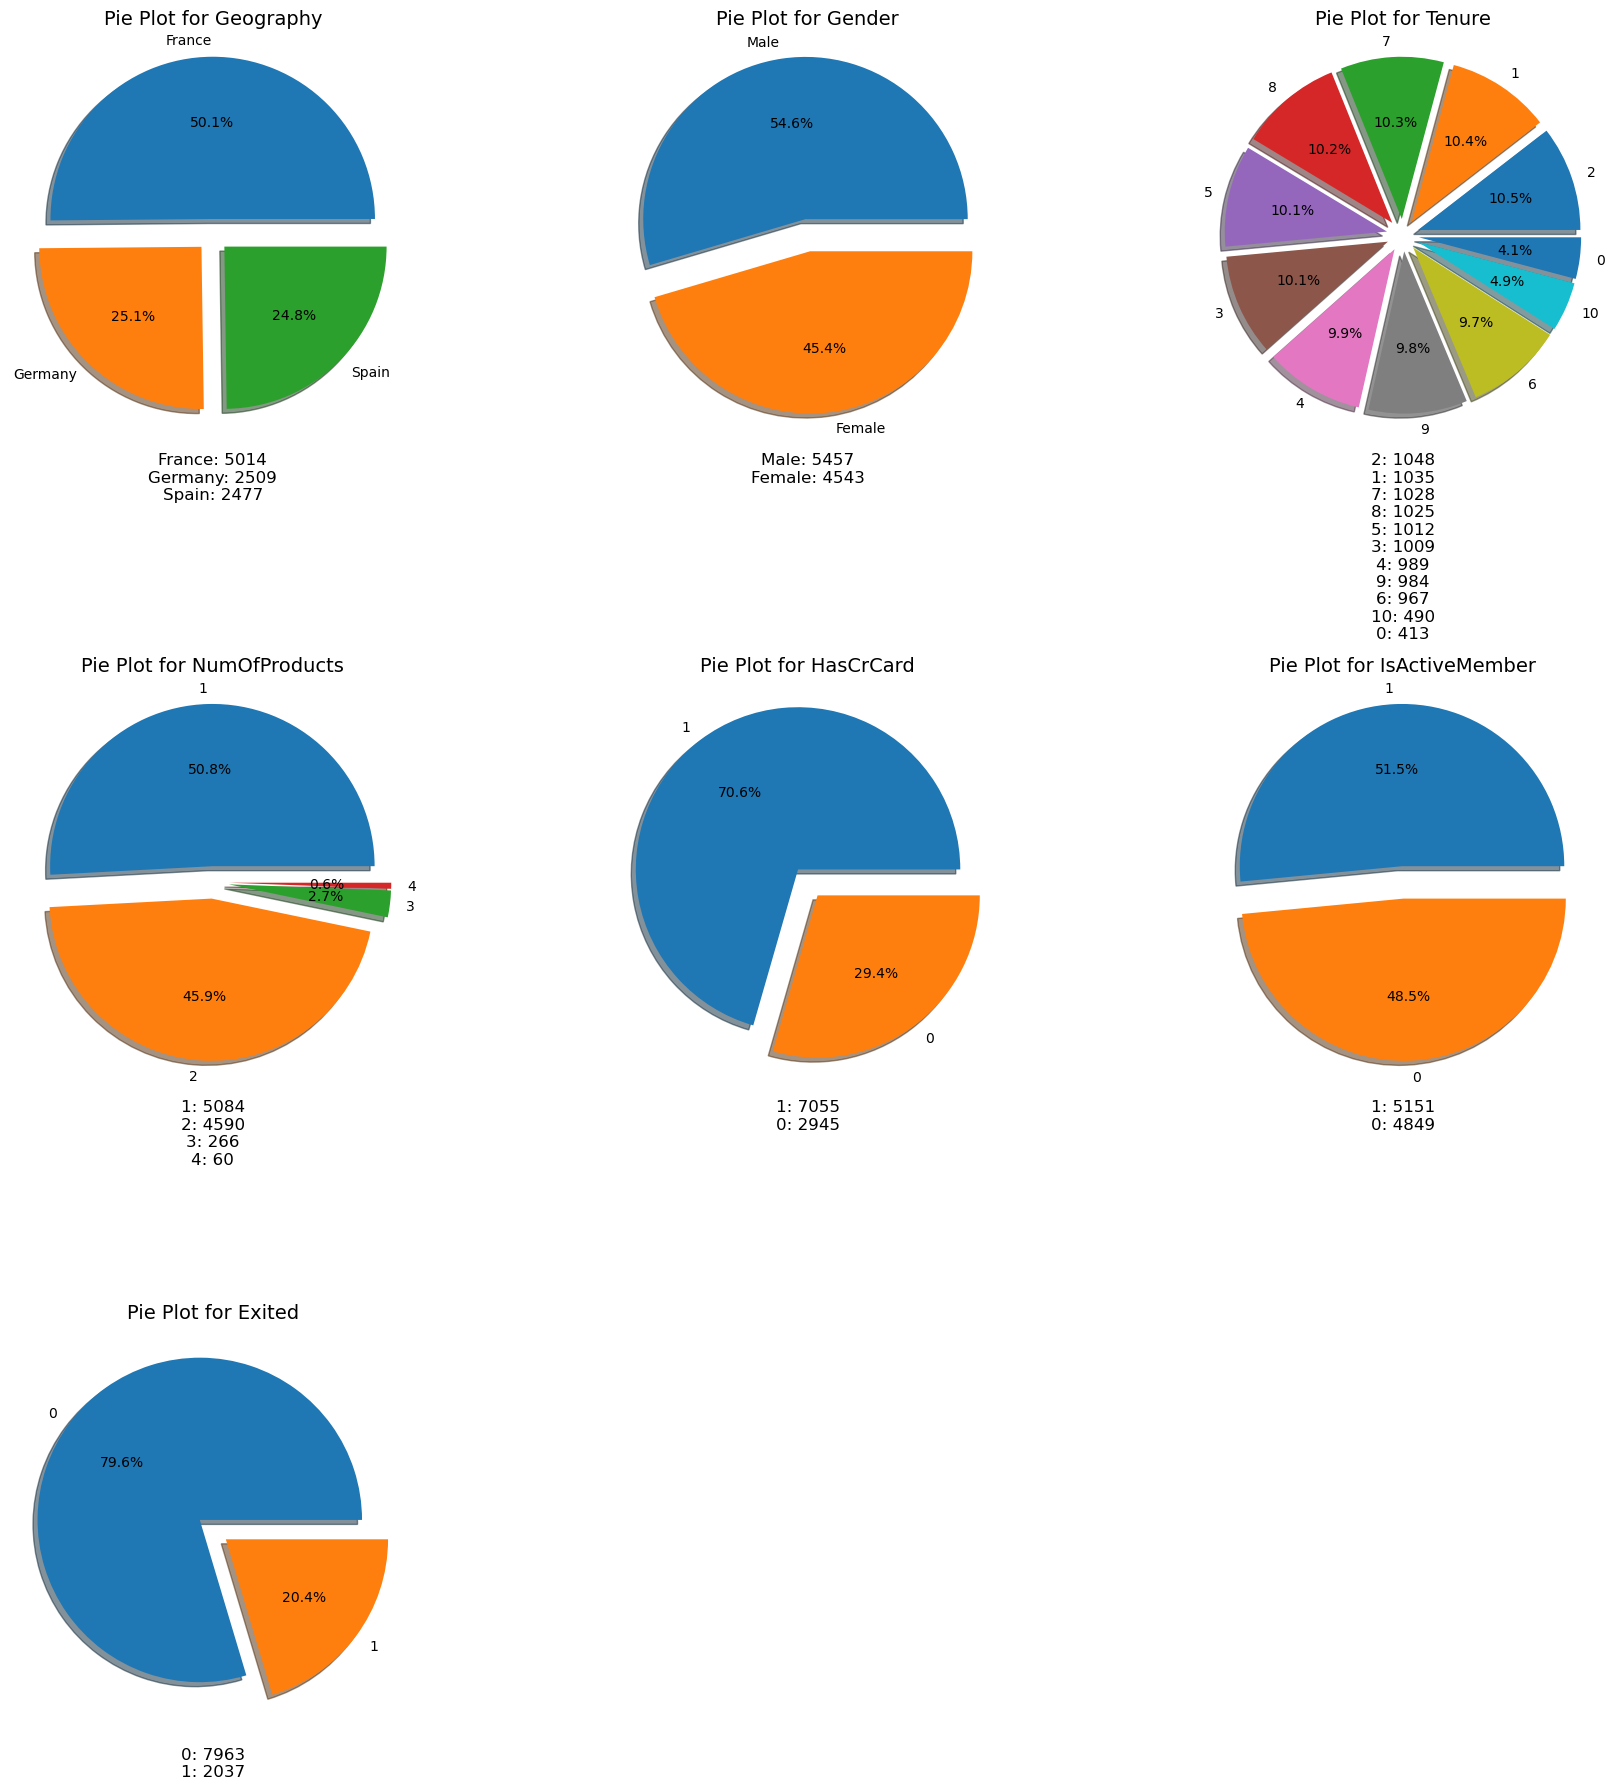

In [29]:
# Pie Chart
# Grid setup
num_plots = len(cat_data.columns)
cols = 3  # Number of plots per row
rows = (num_plots + cols - 1) // cols  # Auto-calculate rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))
axes = axes.flatten()

for i in range(num_plots):
    col = cat_data.columns[i]
    ax = axes[i]

    # Value counts and percentages
    values = cat_data[col].value_counts()
    percentages = values / len(cat_data) * 100

    # Pie plot
    explode = [0.1] * len(values) if len(values) > 1 else None
    ax.pie(
        percentages,
        labels=values.index,
        autopct='%0.1f%%',
        explode=explode,
        shadow=True
    )
    ax.set_title(f'Pie Plot for {col}', fontsize=14)

    # Display value counts below the pie chart
    count_text = '\n'.join([f'{idx}: {val}' for idx, val in values.items()])
    ax.text(0.5, -0.035, count_text, ha='center', va='top', transform=ax.transAxes, fontsize=12)

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- For all numerical

In [30]:
num_data=df[['CreditScore','Age','Balance','Tenure','EstimatedSalary']]
num_data.head()

,CreditScore,Age,Balance,Tenure,EstimatedSalary
0,619,42,0.00,2,101348.88
1,608,41,83807.86,1,112542.58
2,502,42,159660.80,8,113931.57
3,699,39,0.00,1,93826.63
4,850,43,125510.82,2,79084.10


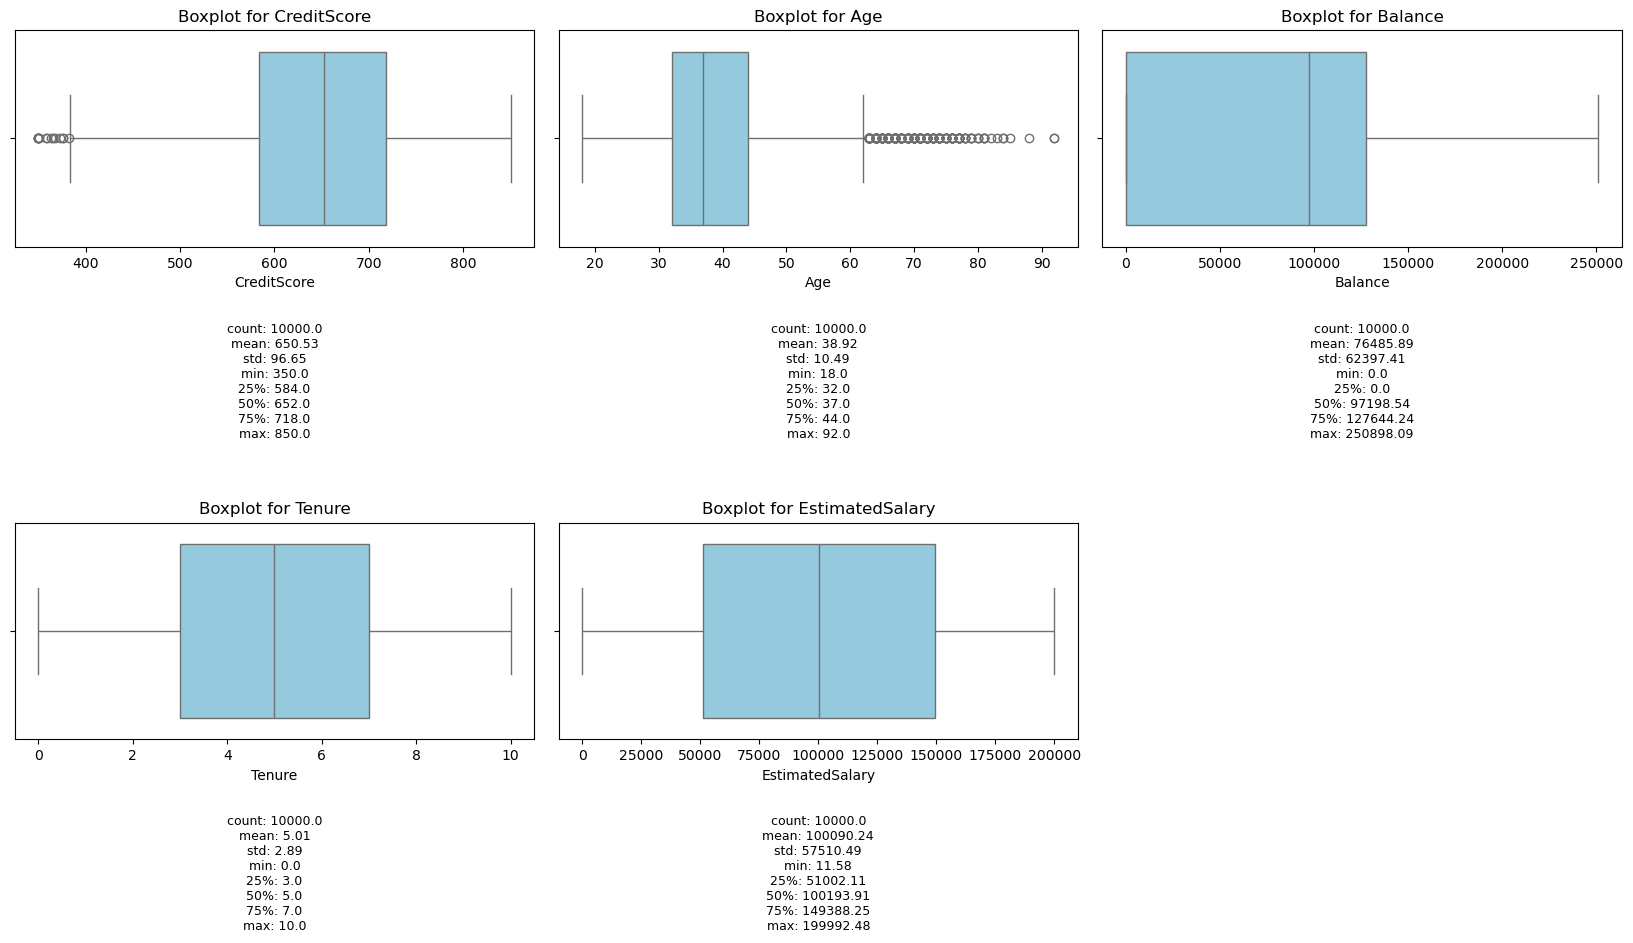

In [32]:
# Boxplot
# Grid layout setup
num_plots = len(num_data.columns)
cols = 3  # Number of plots per row
rows = (num_plots + cols - 1) // cols  # Auto rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5.5, rows * 5))
axes = axes.flatten()

for i in range(num_plots):
    col = num_data.columns[i]
    ax = axes[i]

    # Boxplot
    sns.boxplot(x=num_data[col], ax=ax, color='skyblue')
    ax.set_title(f'Boxplot for {col}', fontsize=12)
    ax.set_xlabel(col)

    # Prepare .describe() summary as text
    stats = num_data[col].describe()
    desc_text = '\n'.join([f"{idx}: {round(val, 2)}" for idx, val in stats.items()])

    # Display summary below each plot
    ax.text(0.5, -0.35, desc_text, ha='center', va='top', transform=ax.transAxes, fontsize=9)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

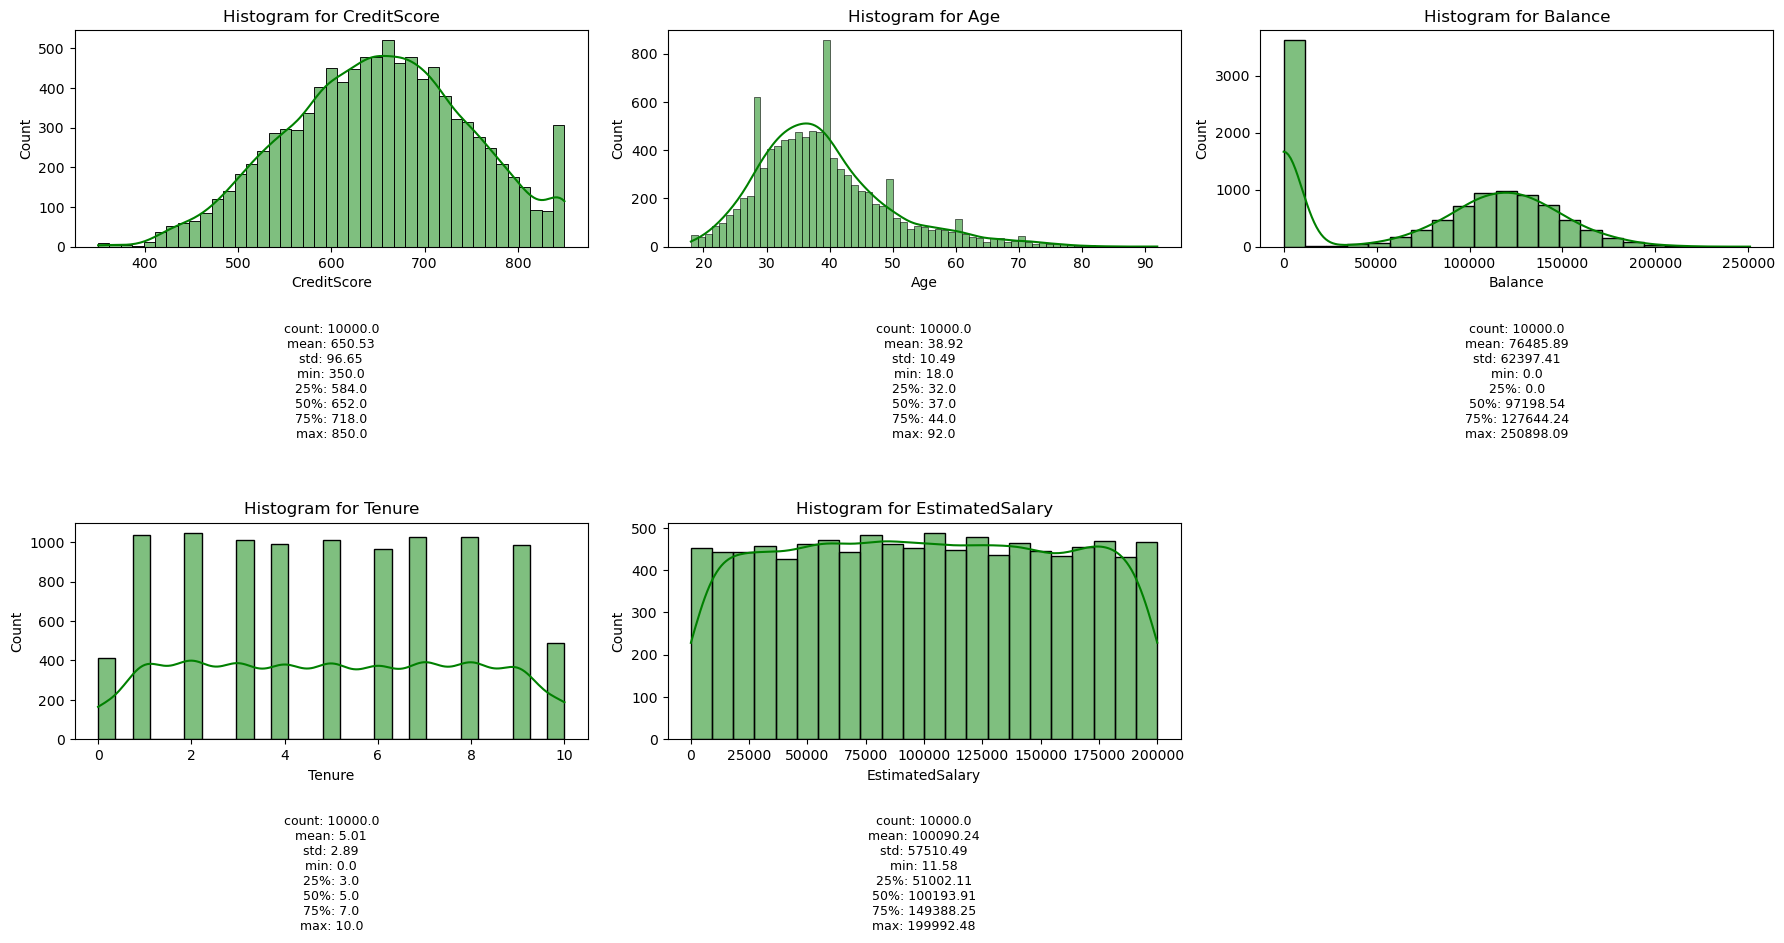

In [34]:
# Histplot
# Grid layout setup
num_plots = len(num_data.columns)
cols = 3  # Number of plots per row
rows = (num_plots + cols - 1) // cols  # Calculate rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()

for i in range(num_plots):
    col = num_data.columns[i]
    ax = axes[i]

    # Plot histogram with KDE
    sns.histplot(num_data[col], bins='auto', kde=True, ax=ax, color='green')
    ax.set_title(f'Histogram for {col}', fontsize=12)
    ax.set_xlabel(col)

    # Get .describe() values
    stats = num_data[col].describe()
    desc_text = '\n'.join([f"{idx}: {round(val, 2)}" for idx, val in stats.items()])

    # Display stats below plot
    ax.text(0.5, -0.35, desc_text, ha='center', va='top', transform=ax.transAxes, fontsize=9)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Bi-variate analysis

For categorical- categorical features
- We use count plot, pie chat
- we need to do for exited-geography, Exited- gender, Exited- Tenure, Exited-Numofprodutcs, exited-Hascrcard, Exited- Isactive mmember.

In [36]:
ca_data=df[['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']]
ca_data.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,1,1,1
1,Spain,Female,1,0,1
2,France,Female,3,1,0
3,France,Female,2,0,0
4,Spain,Female,1,1,1


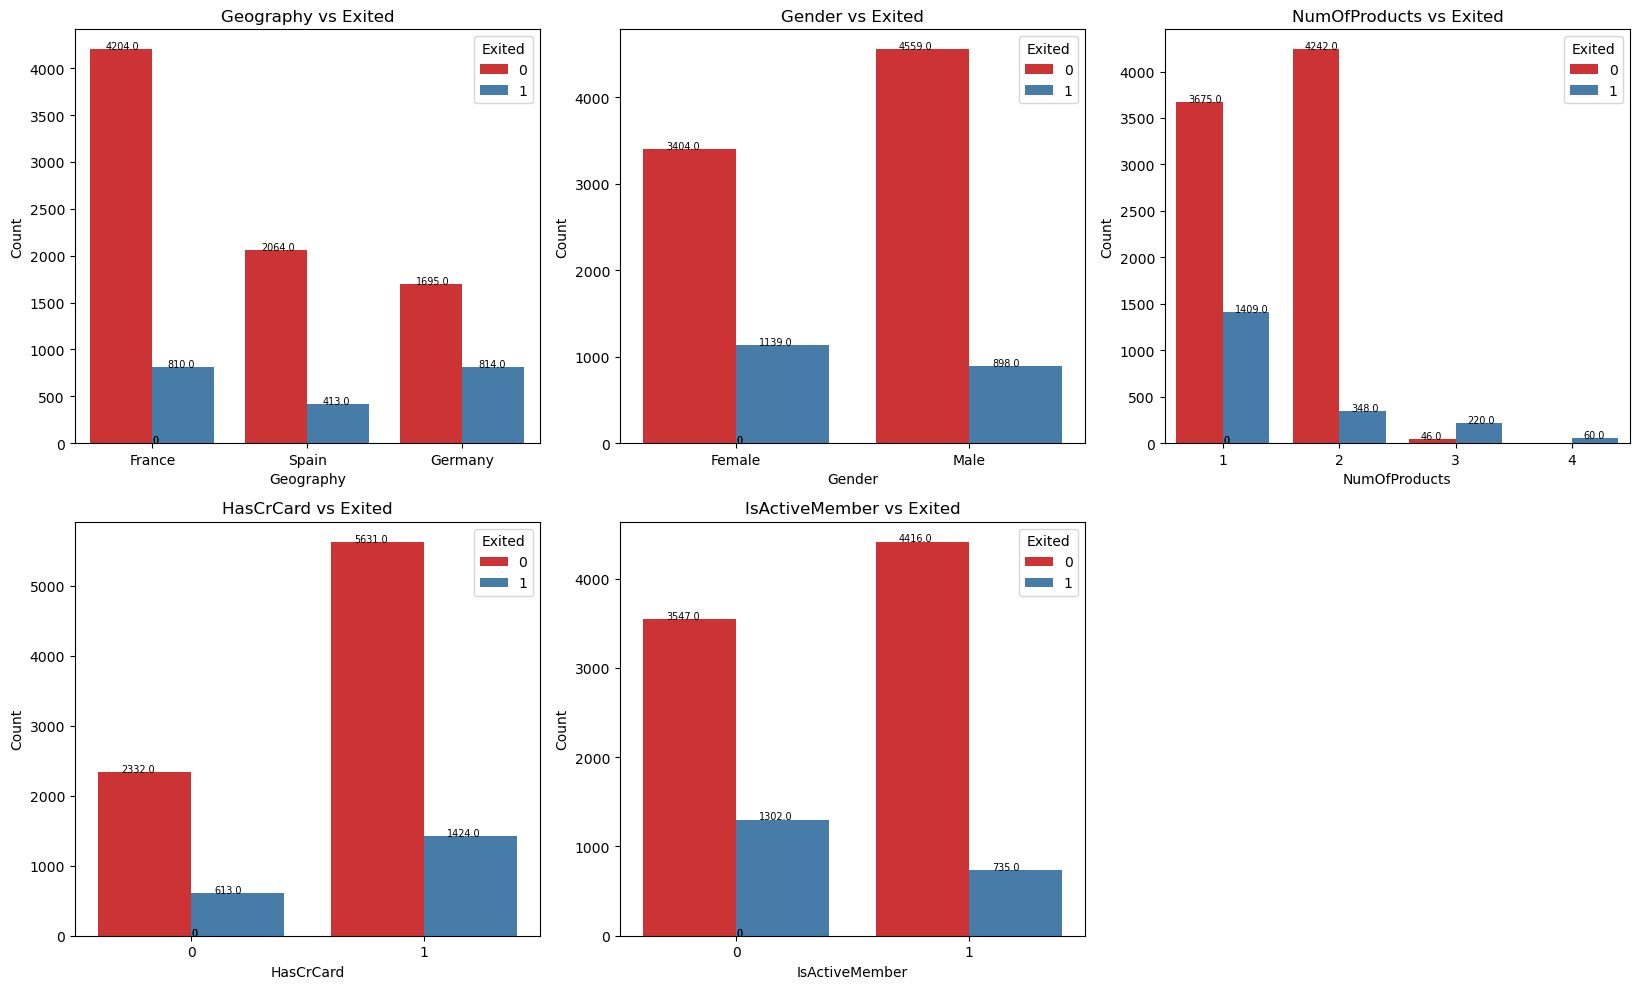

In [38]:
# Countplot
# Subplot grid setup
num_plots = len(ca_data.columns)
cols = 3
rows = (num_plots + cols - 1) // cols

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5.5, rows * 5))
axes = axes.flatten()

for i in range(num_plots):
    col = ca_data.columns[i]
    ax = axes[i]

    # Countplot with Exited hue
    sns.countplot(x=ca_data[col], hue=df['Exited'], ax=ax, palette='Set1')
    ax.set_title(f'{col} vs Exited', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Annotate each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 4, height + 0.5), fontsize=7)

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

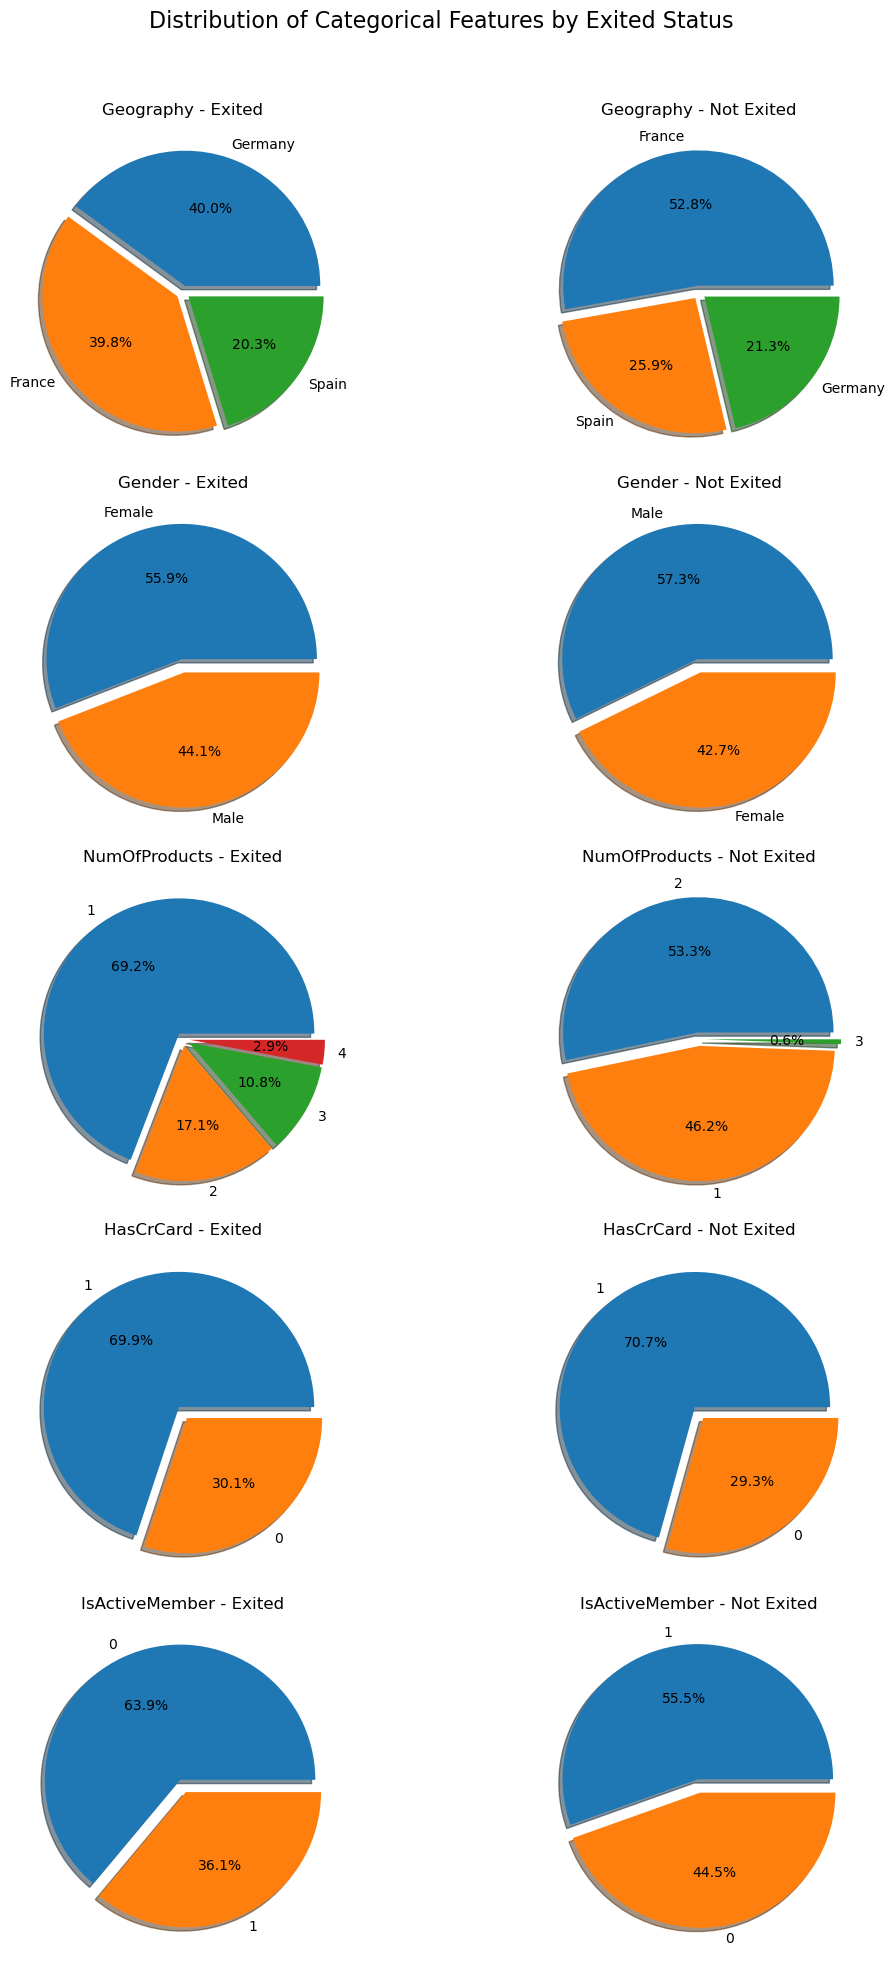

In [41]:
# Total number of features
cat_cols = ca_data.columns.tolist()
rows = len(cat_cols)
cols = 2  # One for Exited=1, one for Exited=0

# Create a figure
plt.figure(figsize=(12, rows * 4))

# Subplot index tracker
plot_index = 1

for col in cat_cols:
    # Value distributions
    exited = df[df['Exited'] == 1][col].value_counts(normalize=True) * 100
    not_exited = df[df['Exited'] == 0][col].value_counts(normalize=True) * 100

    # Pie for Exited = 1
    plt.subplot(rows, cols, plot_index)
    plt.pie(exited, labels=exited.index.astype(str), autopct='%0.1f%%',
            explode=[0.05]*len(exited), shadow=True)
    plt.title(f'{col} - Exited')
    plot_index += 1

    # Pie for Exited = 0
    plt.subplot(rows, cols, plot_index)
    plt.pie(not_exited, labels=not_exited.index.astype(str), autopct='%0.1f%%',
            explode=[0.05]*len(not_exited), shadow=True)
    plt.title(f'{col} - Not Exited')
    plot_index += 1

plt.suptitle("Distribution of Categorical Features by Exited Status", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

For categorical- Numerical
- We can use box plot, histplot, kde plot.
- We need to plot for extied- CreditScore, Age, Balance, Estimated salary.

In [40]:
nu_data=df[['CreditScore', 'Age','Tenure','Balance', 'EstimatedSalary']]
nu_data.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,619,42,2,0.00,101348.88
1,608,41,1,83807.86,112542.58
2,502,42,8,159660.80,113931.57
3,699,39,1,0.00,93826.63
4,850,43,2,125510.82,79084.10


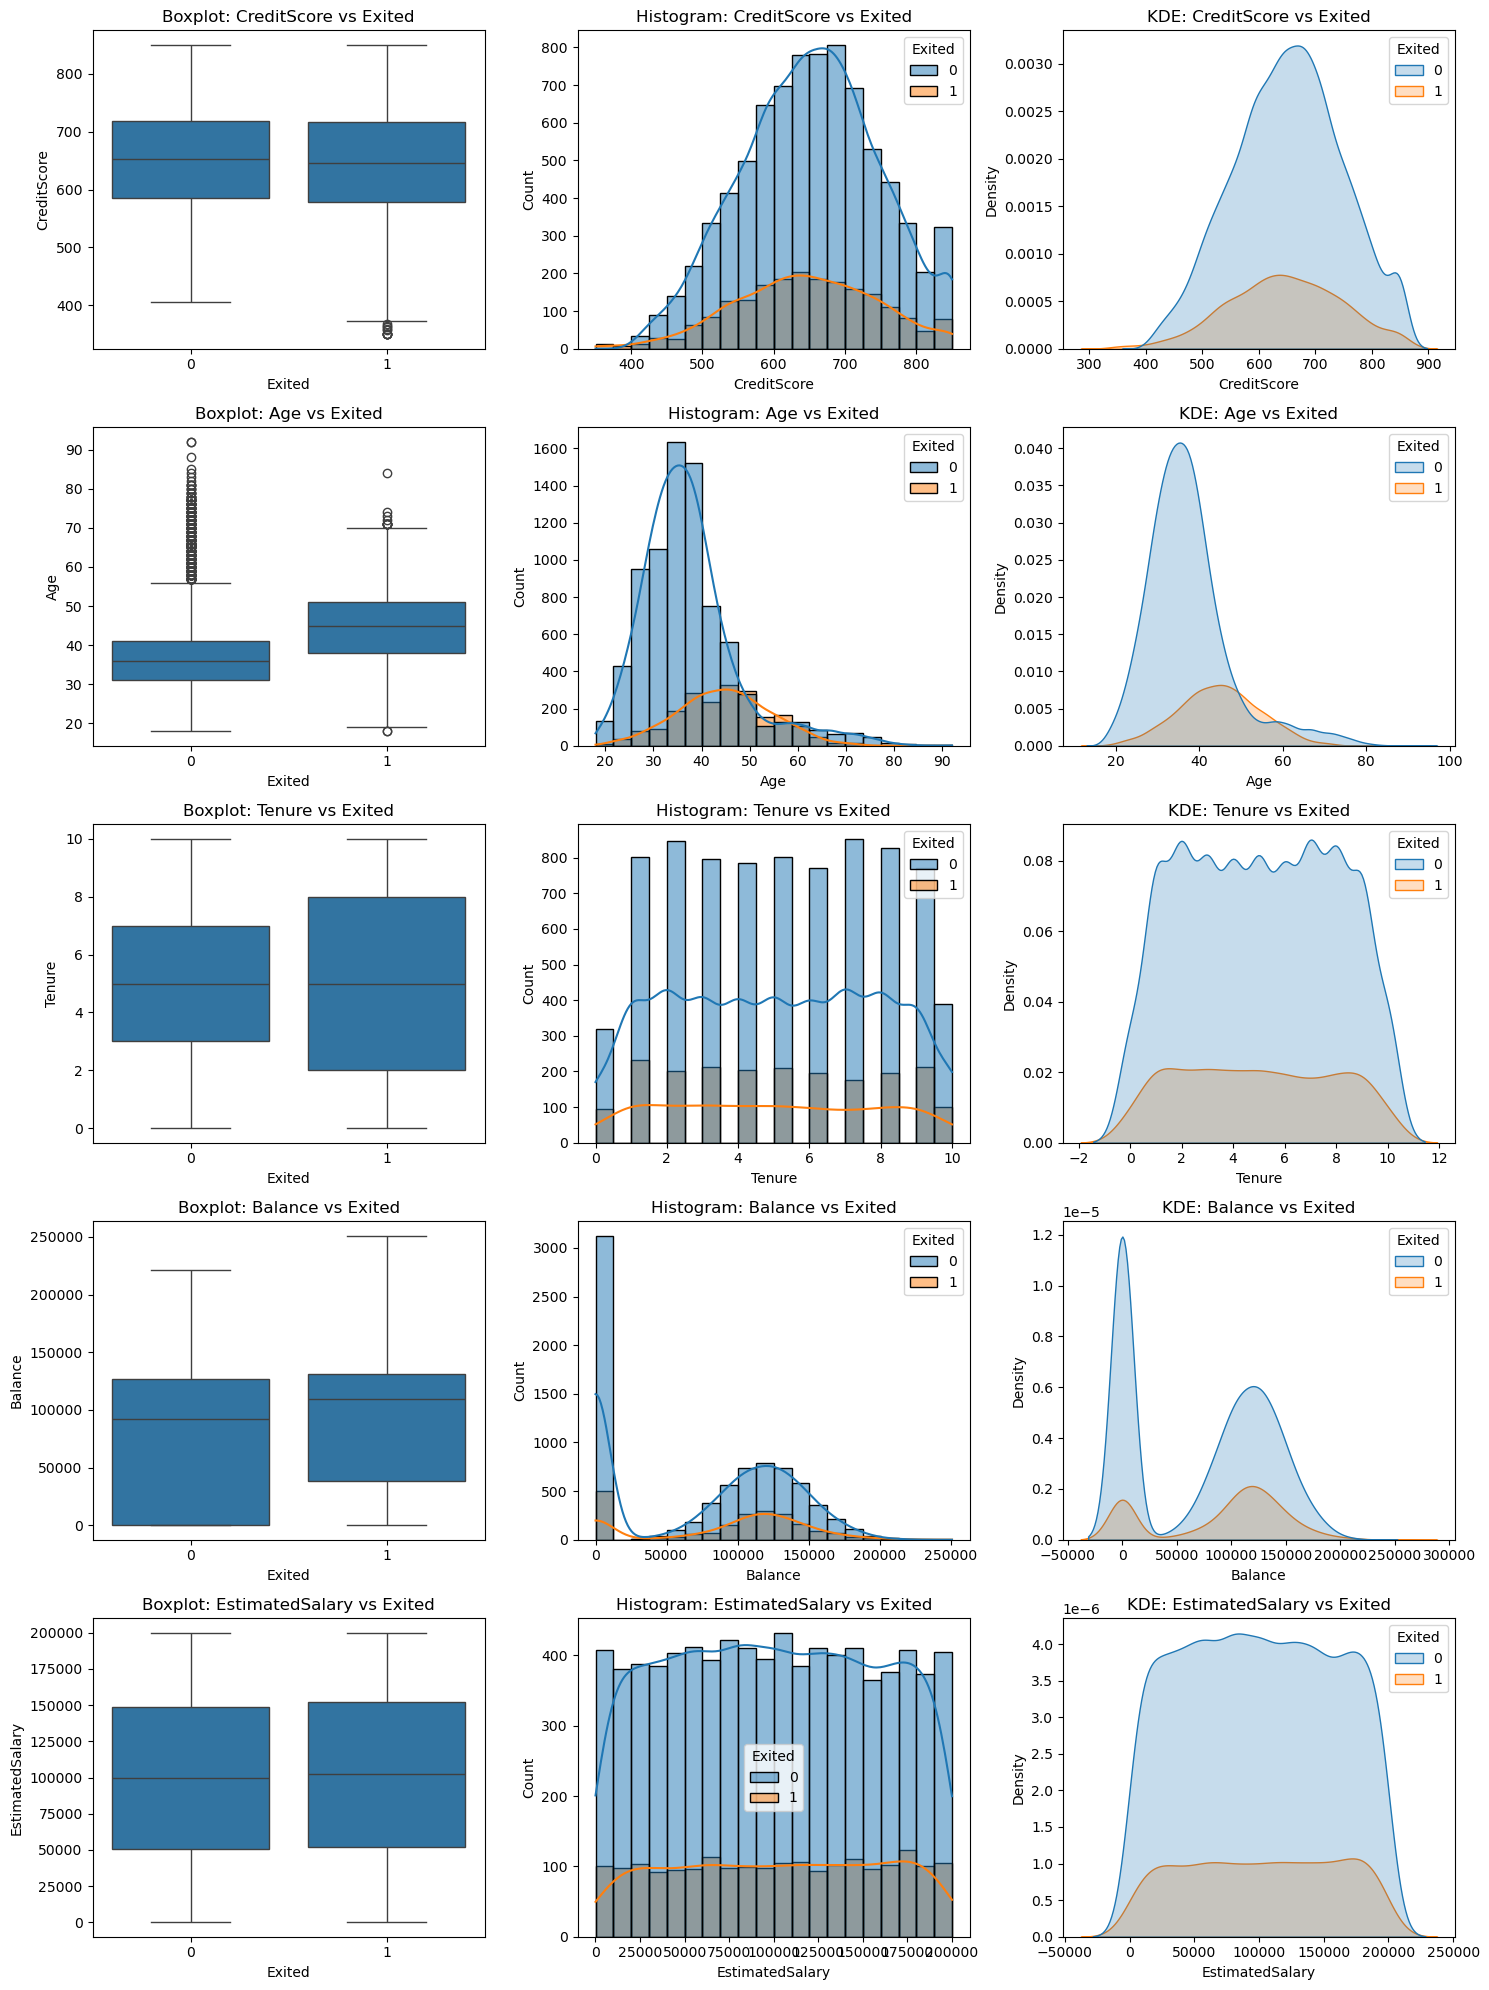

In [42]:
# Number of features
num_features = len(nu_data.columns)

# Create subplots (3 plots per row: box, hist, kde)
fig, axes = plt.subplots(num_features, 3, figsize=(15, num_features * 4))

# Loop through numeric columns
for i, column_name in enumerate(nu_data.columns):
    # --- Boxplot ---
    sns.boxplot(x=df['Exited'], y=nu_data[column_name], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot: {column_name} vs Exited')
    axes[i, 0].set_xlabel('Exited')
    axes[i, 0].set_ylabel(column_name)

    # --- Histplot ---
    sns.histplot(x=nu_data[column_name], hue=df['Exited'], kde=True, bins=20, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram: {column_name} vs Exited')
    axes[i, 1].set_xlabel(column_name)

    # --- KDEplot ---
    sns.kdeplot(x=nu_data[column_name], hue=df['Exited'], fill=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'KDE: {column_name} vs Exited')
    axes[i, 2].set_xlabel(column_name)

plt.tight_layout()
plt.show()

For Numerical- Numerical
- we use correlation plot , Heat map, scatter plot etc
- We need to plot for all num-num

- Correlation plot

In [43]:
numeric_data=df.select_dtypes(include='number')
numeric_data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

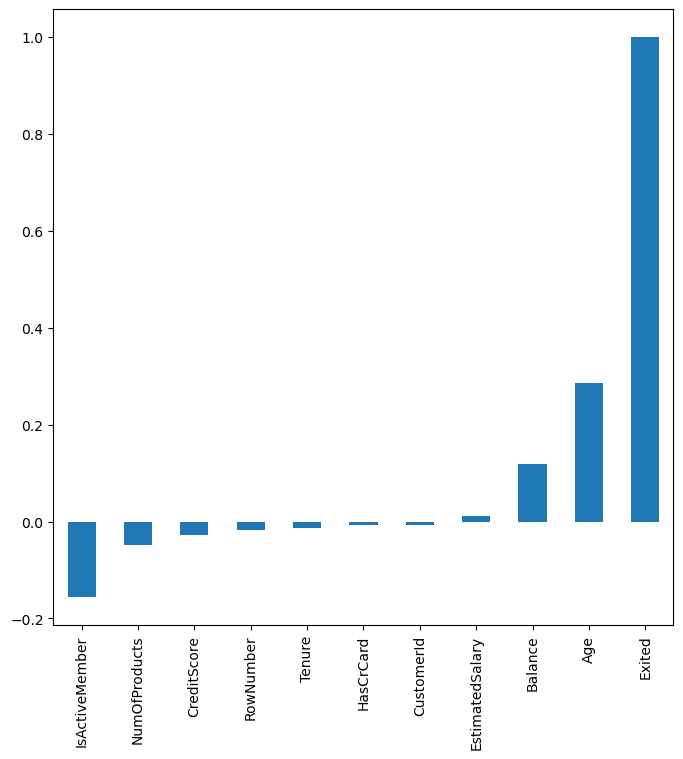

In [70]:
plt.figure(figsize=(8,8))
numeric_data.corr()['Exited'].sort_values(ascending=True).plot(kind='bar')


- Heatmap

Text(0.5, 1.0, 'Heatmap')

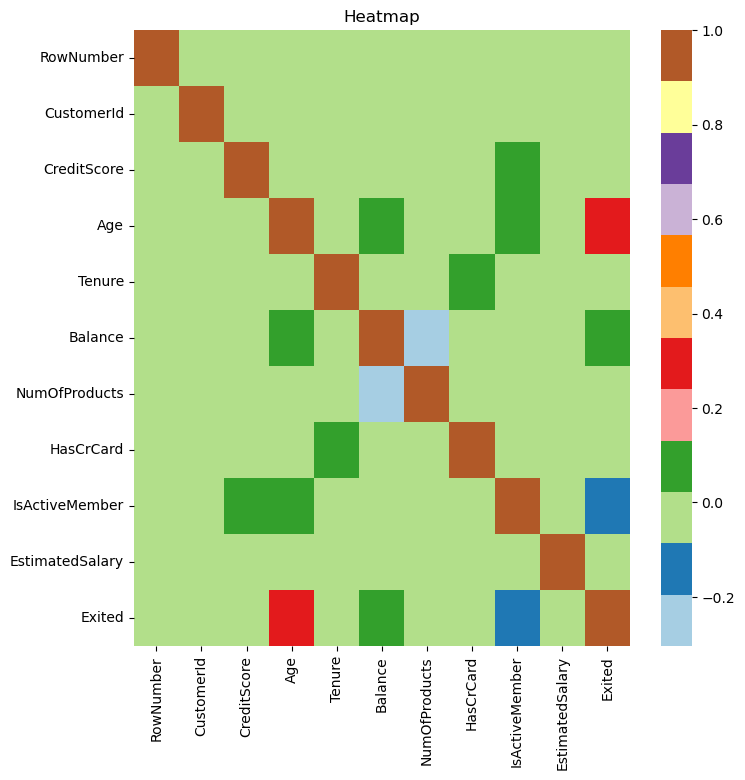

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(numeric_data.corr(), cmap='Paired')
plt.title("Heatmap")